In [60]:
import pandas as pd
import seaborn as sns
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [61]:
solar_data['cum_power'].mean().round()

23776.0

In [62]:
for index, power in solar_data['cum_power'].items():
    if power == -1:
        solar_data['cum_power'].iloc[index] = (solar_data['cum_power'].iloc[index-1]+solar_data['cum_power'].iloc[index+1]) / 2
    

C:\Users\cahek\AppData\Local\Temp\ipykernel_25072\1352775737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'].iloc[index] = (solar_data['cum_power'].iloc[index-1]+solar_data['cum_power'].iloc[index+1]) / 2


In [63]:
solar_data['day_power'] = solar_data['cum_power'].diff()
solar_data.head()

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0


In [64]:
solar_data_temp = solar_data.copy()
solar_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
 2   day_power  663 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.7+ KB


In [65]:
solar_data_temp['date'] = pd.to_datetime(solar_data_temp['date'])
solar_data_temp['date'] = solar_data_temp['date'].dt.to_period('M')
solar_data_temp.head()

,date,cum_power,day_power
0,2017-01,20111.0,NaN
1,2017-01,20112.0,1.0
2,2017-01,20115.0,3.0
3,2017-01,20117.0,2.0
4,2017-01,20119.0,2.0


In [66]:
solar_data_temp = solar_data_temp.groupby('date')['day_power'].mean()

In [67]:
solar_data_temp['2017-03'].round()

11.0

TypeError: Invalid object type at position 0

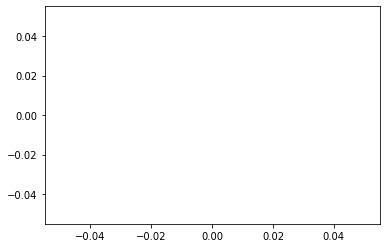

In [69]:
plot = sns.lineplot(data=solar_data_temp)
